**The purpose of the analysis**

understanding the factors that influence Airbnb prices in New York City, or identifying patterns of all variables and Our analysis provides useful information for travelers and hosts in the city and also provides some best insights for Airbnb business

#**1. Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# **2. Loading the Dataset**

In [ ]:
airbnb = pd.read_csv("/content/Airbnb NYC 2019 - Airbnb NYC 2019.csv")
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# **3. Explore Dataset**

In [ ]:
airbnb.index

RangeIndex(start=0, stop=48895, step=1)

In [ ]:
airbnb.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
airbnb.info()

# First use .info() to get the overall information about the data, gather insights from the same.

# Total 48895 records are available
# name ,host_name, last_reviews, reviews_per_month contain null values
# All data types are relevant except 'last_review' columns so only need to change these columns' data type
# We can change the id to listing_id and name to listing_name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

After understanding about each column I write down some insigths from it

In [ ]:
# id - unique identifier for each listing in the dataset
print(airbnb['id'].nunique())

48895


In [ ]:
# name - This is the name or title of the listing, as it appears on the Airbnb website
print(airbnb['name'].head())

0                  Clean & quiet apt home by the park
1                               Skylit Midtown Castle
2                 THE VILLAGE OF HARLEM....NEW YORK !
3                     Cozy Entire Floor of Brownstone
4    Entire Apt: Spacious Studio/Loft by central park
Name: name, dtype: object


In [ ]:
# host_id - This is the unique identifier for the each host in the dataset
print(airbnb['host_id'].nunique())

37457


In [ ]:
# host_name - This is the name of the host as it appears on the Airbnb website
print(airbnb['host_name'].head())

0           John
1       Jennifer
2      Elisabeth
3    LisaRoxanne
4          Laura
Name: host_name, dtype: object


In [ ]:
# neighbourhood_group - This is the grouping of neighborhoods in New York City
print(airbnb['neighbourhood_group'].value_counts())

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


In [ ]:
# neighbourhood - This is the specific neighborhood in which the listing is located
print(airbnb['neighbourhood'].value_counts())
print()
print(airbnb['neighbourhood'].nunique())

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

221


In [ ]:
# longitude - This is the geographical longitude of the listing
print(airbnb['longitude'].head())

0   -73.97237
1   -73.98377
2   -73.94190
3   -73.95976
4   -73.94399
Name: longitude, dtype: float64


In [ ]:
# letitude  - This is the geographical latitude of the listing
print([airbnb['longitude'].head()])

[0   -73.97237
1   -73.98377
2   -73.94190
3   -73.95976
4   -73.94399
Name: longitude, dtype: float64]


In [ ]:
# room_type - This is the type of room or property being offered,such as an entire home,private room,shared room
print([airbnb['room_type'].value_counts()])

[Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64]


In [ ]:
# price - This is the nightly price of the listing in US dollars
print([airbnb['price'].head()])

[0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64]


In [ ]:
# minimum_nights - This is the number of minimum nights that a guest must stay at the listing
print([airbnb['minimum_nights'].value_counts()])

[1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64]


In [ ]:
# number_of_reviews - This is the total number of reviews that listing has recieved
print(airbnb['number_of_reviews'].head())

0      9
1     45
2      0
3    270
4      9
Name: number_of_reviews, dtype: int64


In [ ]:
# last_review - This is the latest review of the listing
print(airbnb['last_review'].head())

0    2018-10-19
1    2019-05-21
2           NaN
3    2019-07-05
4    2018-11-19
Name: last_review, dtype: object


In [ ]:
# reviews_per_month - This is the average number of reviews that the listing recieves per month
print(airbnb['reviews_per_month'].head())

0    0.21
1    0.38
2     NaN
3    4.64
4    0.10
Name: reviews_per_month, dtype: float64


In [ ]:
# calculated_host_listings_count - This is the total number of lisitings that the host has on Airbnb
print([airbnb['calculated_host_listings_count'].value_counts()])

[1      32303
2       6658
3       2853
4       1440
5        845
6        570
8        416
7        399
327      327
9        234
232      232
10       210
96       192
12       180
13       130
121      121
11       110
52       104
103      103
33        99
49        98
91        91
87        87
15        75
14        70
23        69
34        68
17        68
65        65
31        62
28        56
18        54
25        50
50        50
47        47
43        43
20        40
39        39
37        37
32        32
30        30
29        29
27        27
26        26
21        21
19        19
16        16
Name: calculated_host_listings_count, dtype: int64]


In [ ]:
# availability_365 - This is the number in next 365 days that the listing is available for booking
print(airbnb['availability_365'].head())

0    365
1    355
2    365
3    194
4      0
Name: availability_365, dtype: int64


In [ ]:
#Checking how many null values are present in the data
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Checking that is there any duplicat value present or not
print(airbnb.duplicated().value_counts())
print()
print(airbnb['id'].duplicated().value_counts())
print()
print(airbnb['host_id'].duplicated().value_counts())
print()
print(airbnb['name'].duplicated().value_counts())
print()
print(airbnb['host_name'].duplicated().value_counts())

False    48895
dtype: int64

False    48895
Name: id, dtype: int64

False    37457
True     11438
Name: host_id, dtype: int64

False    47893
True      1002
Name: name, dtype: int64

True     37442
False    11453
Name: host_name, dtype: int64


In [ ]:
# Mathematical insigths
airbnb[['price','number_of_reviews','reviews_per_month' , 'minimum_nights']].describe()

,price,number_of_reviews,reviews_per_month,minimum_nights
count,48895.000000,48895.000000,38843.000000,48895.000000
mean,152.720687,23.274466,1.373221,7.029962
std,240.154170,44.550582,1.680442,20.510550
min,0.000000,0.000000,0.010000,1.000000
25%,69.000000,1.000000,0.190000,1.000000
50%,106.000000,5.000000,0.720000,3.000000
75%,175.000000,24.000000,2.020000,5.000000
max,10000.000000,629.000000,58.500000,1250.000000


# **4. Data Cleaning and manipulate**

In [ ]:
# make a copy,named 'anb1' of original dataframe and use for Data cleaning and manipulating. We can use original dataframe 'airbnb' in future if we need.
anb1 = airbnb.copy()
anb1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#converting 'last_review' data type from object to datetime and find the last entry date
anb1['last_review'] = pd.to_datetime(anb1['last_review'])
print(anb1['last_review'].max())

#now fill all null values in 'last_review' columns with a dumy date(2019-07-09) which come after  last entry date(2019-07-08) which not effect the analysis of the data
anb1['last_review'] = anb1['last_review'].fillna(datetime.datetime(2019,7,9))

#now fill all null values in 'reviews_per_month' with 0
anb1['reviews_per_month'] = anb1['reviews_per_month'].fillna(0)

2019-07-08 00:00:00


In [ ]:
#drop these rows which contain null values in name and host_name columns
anb1 = anb1.dropna(subset = ['name','host_name'])

In [ ]:
#check for confermation that there is no null value present.

anb1.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
# change the name of some columns

anb1 = anb1.rename(columns = {'id' : 'listing_id' , 'name' : 'listing_name'})
anb1.head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-07-09,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#**5. Handling Outliers**

In [ ]:
# We can see that the average price is 152.74,
# the min price is showing as zero and the max price as 10,000.
# Something isn't right with the data, so need to look into this issue and check for outliers.

# Checking for outliers
anb1.agg({'price':['mean','median','max','min','count']})

,price
mean,152.740309
median,106.000000
max,10000.000000
min,0.000000
count,48858.000000


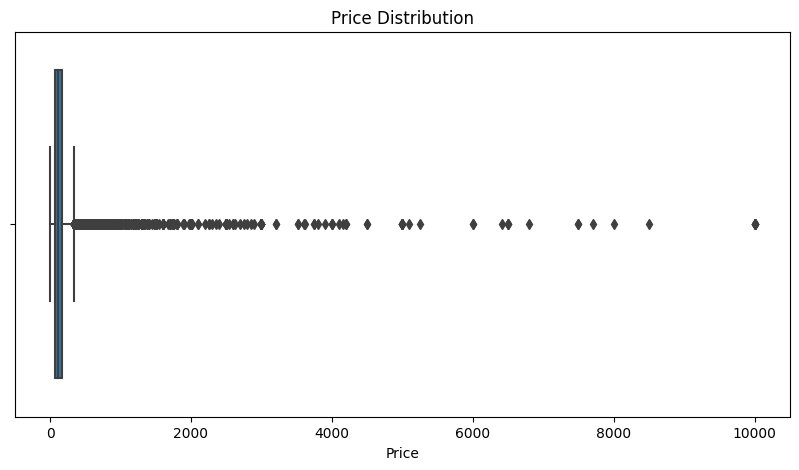

In [ ]:
#The minimum value is set as zero, which does not make any sense since there are no free rooms on Airbnb - and the maximum value is set 10,000 - which just seems too high.
# Notice how the mean is considerably higher than the median. This is an indication that outliers is present in Price columns.

#Let's use a boxplot to get a better understanding of price distribution:
#Plotting the boxplot of the price data.
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='price', data=anb1).set_title('Price Distribution')
plt.xlabel('Price')
plt.show()

In [ ]:
# As expected there are outliers present in the data.
# In order to fix this, we will be using the quantile based flooring and capping.
# First, let's print the 001th and 98th percentile of the price column.

print("001th percentile ",anb1['price'].quantile(0.001))
print('and 98th percentile ',anb1['price'].quantile(0.98))

001th percentile  18.0
and 98th percentile  550.0


In [ ]:
Q1 = anb1['price'].quantile(0.001)
Q3 = anb1['price'].quantile(0.98)
IQR = Q3 - Q1
print(IQR)

532.0


In [ ]:
lower_lim = Q1
upper_lim = Q3 + 1.5 * IQR
print(lower_lim)
print(upper_lim)

18.0
1348.0


In [ ]:
# #removing the values below 001th percentile and above 90th percentile and make a new dataframe named "anb"
anb = anb1[(anb1['price']>lower_lim) & (anb1['price']<upper_lim)]
anb.shape

(48631, 16)

In [ ]:
anb["log_price"] = np.log(anb["price"])
anb["log_price"]

<ipython-input-36-a9804903d8c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anb["log_price"] = np.log(anb["price"])


0        5.003946
1        5.416100
2        5.010635
3        4.488636
4        4.382027
           ...   
48890    4.248495
48891    3.688879
48892    4.744932
48893    4.007333
48894    4.499810
Name: log_price, Length: 48631, dtype: float64

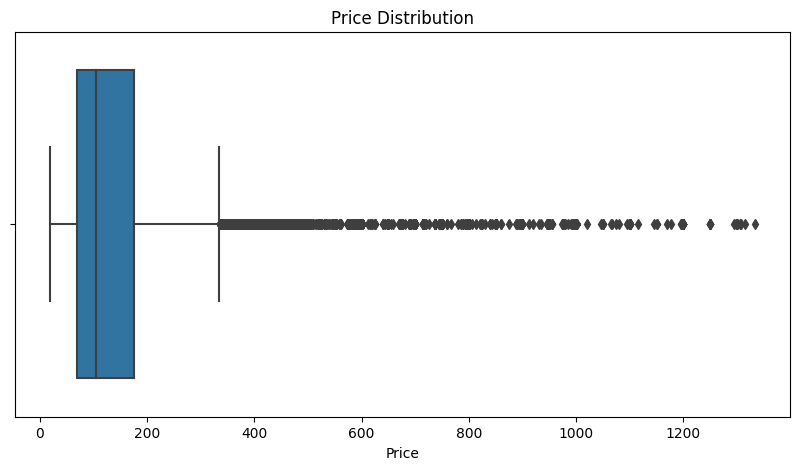

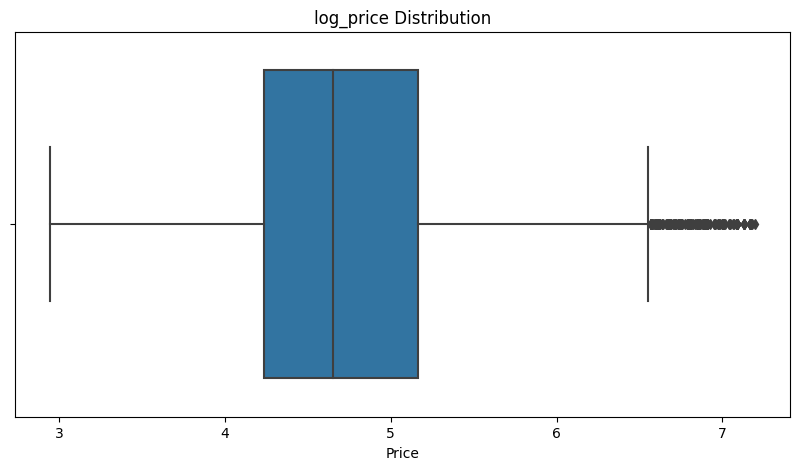

In [ ]:
#Lets create a new boxplot and check the result.

plt.figure(figsize=(10,5))
sns.boxplot(x='price', data=anb).set_title('Price Distribution')
plt.xlabel('Price')
plt.show()
plt.figure(figsize=(10,5))
sns.boxplot(x='log_price', data=anb).set_title('log_price Distribution')
plt.xlabel('Price')
plt.show()

#**6. Data Analysis and Visualization**

In [ ]:
anb.head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,log_price
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,5.003946
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5.416100
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-07-09,0.00,1,365,5.010635
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,4.488636
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4.382027


**(1) Find Distribution Of Airbnb Bookings Price Range.**

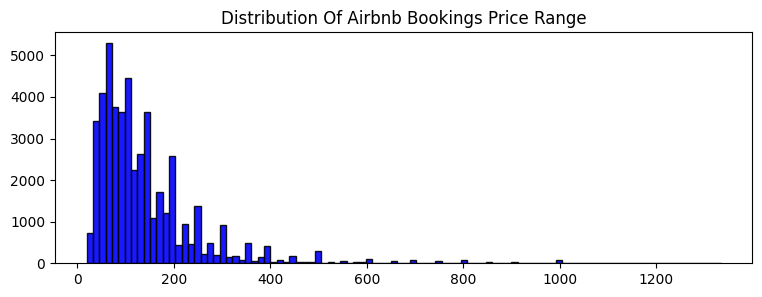

In [ ]:
plt.figure(figsize=(9,3))
plt.hist(anb['price'], bins=100, color='blue',alpha = 0.9,ec='black');
plt.title("Distribution Of Airbnb Bookings Price Range")
plt.show()

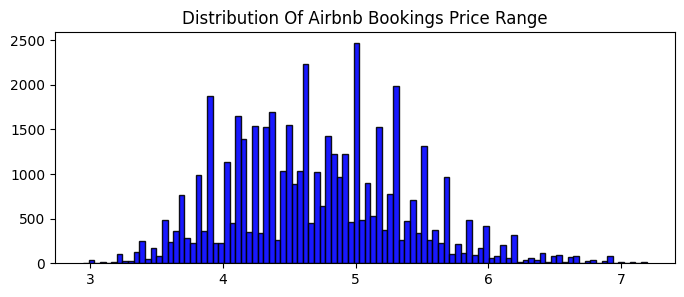

In [ ]:
plt.figure(figsize=(8,3))
plt.hist(anb['log_price'], bins=100, color='blue',alpha = 0.9,ec='black');
plt.title("Distribution Of Airbnb Bookings Price Range")
plt.show()

**(2) Find Total Listing/Property count in Each Neighborhood Group in NYC**



In [ ]:
anb_property_count = anb.groupby('neighbourhood_group')['listing_id'].count().reset_index()
anb_property_count.columns = ['neighbourhood_group','Property count']
anb_property_count

,neighbourhood_group,Property count
0,Bronx,1086
1,Brooklyn,20025
2,Manhattan,21503
3,Queens,5646
4,Staten Island,371


**(3) Find Average Price Of listings/property in each Neighborhood Groups and also Neighborhood**

In [ ]:
print("Average Price Of listings/property in each Neighborhood Groups is:")
avg_price1 = anb.groupby('neighbourhood_group').agg({'price' : np.mean}).reset_index()
avg_price1.columns = ['neighbourhood_group','avg_price']
avg_price1

Average Price Of listings/property in each Neighborhood Groups is:


,neighbourhood_group,avg_price
0,Bronx,85.399632
1,Brooklyn,118.574782
2,Manhattan,181.275357
3,Queens,95.360786
4,Staten Island,101.919137


In [ ]:
print("Average Price Of listings/property in each Neighborhoodsis:")
avg_price2 = anb.groupby('neighbourhood')['price'].mean().reset_index()
avg_price2.columns = ['neighbourhood','avg_price']
avg_price2

Average Price Of listings/property in each Neighborhoodsis:


,neighbourhood,avg_price
0,Allerton,87.595238
1,Arden Heights,67.250000
2,Arrochar,115.000000
3,Arverne,154.302632
4,Astoria,100.635045
...,...,...
216,Windsor Terrace,138.993631
217,Woodhaven,67.827586
218,Woodlawn,60.090909
219,Woodrow,700.000000


In [ ]:
avgprice = anb.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()
avgprice

,neighbourhood_group,neighbourhood,price
0,Bronx,Allerton,87.595238
1,Bronx,Baychester,75.428571
2,Bronx,Belmont,77.125000
3,Bronx,Bronxdale,57.105263
4,Bronx,Castle Hill,63.000000
...,...,...,...
216,Staten Island,Tottenville,144.857143
217,Staten Island,West Brighton,80.555556
218,Staten Island,Westerleigh,71.500000
219,Staten Island,Willowbrook,249.000000


**(4) Find Top Neighborhoods and Hosts by Listing/property in entire NYC.**

In [ ]:
#here we find top 10 Neighborhoods by Listing/property in entire NYC.
anb.groupby('neighbourhood')['listing_id'].count().nlargest(10)

# or we can use these method also
#anb.groupby('neighbourhood')['listing_id'].count().sort_values(ascending=False).head(10)

neighbourhood
Williamsburg          3910
Bedford-Stuyvesant    3699
Harlem                2648
Bushwick              2454
Upper West Side       1947
Hell's Kitchen        1945
East Village          1841
Upper East Side       1787
Crown Heights         1559
Midtown               1536
Name: listing_id, dtype: int64

In [ ]:
#here we find top 10 Hosts by Listing/property in entire NYC.
anb.groupby('host_name')['listing_id'].count().nlargest(10)

host_name
Michael         416
David           402
Sonder (NYC)    327
John            294
Alex            278
Blueground      232
Sarah           227
Daniel          226
Maria           202
Jessica         201
Name: listing_id, dtype: int64

In [ ]:
anb.groupby(['neighbourhood','host_name'])['listing_id'].count().nlargest(10)

neighbourhood       host_name   
Financial District  Sonder (NYC)    218
Hell's Kitchen      John             55
Greenpoint          Vida             52
Financial District  Sonder           51
Murray Hill         Sonder (NYC)     50
                    Stanley          50
Midtown             Red Awning       49
Hell's Kitchen      Kara             41
Williamsburg        Michael          41
Bedford-Stuyvesant  Melissa          39
Name: listing_id, dtype: int64

**(5) Find the Number Of Active Hosts Per Location by Each Neighborhood Groups.**

In [ ]:
active_host = anb.groupby('neighbourhood_group')['calculated_host_listings_count'].count().reset_index()
active_host

,neighbourhood_group,calculated_host_listings_count
0,Bronx,1086
1,Brooklyn,20025
2,Manhattan,21503
3,Queens,5646
4,Staten Island,371


**(6) Find Total Counts Of Each Room Types in entire NYC.**

In [ ]:
room_counts = anb['room_type'].value_counts().reset_index()
room_counts.columns = ['room_type','Total counts']
room_counts

,room_type,Total counts
0,Entire home/apt,25236
1,Private room,22249
2,Shared room,1146


**(7) Find Stay Requirement counts by Minimum Nights.**

In [ ]:
stay_req = anb['minimum_nights'].value_counts()
stay_req

1      12604
2      11668
3       7979
30      3729
4       3291
       ...  
68         1
99         1
87         1
183        1
36         1
Name: minimum_nights, Length: 107, dtype: int64

**(8) Find the total numbers of Reviews and Maximum Reviews by Each Neighborhood Group.**

In [ ]:
anb.groupby('neighbourhood_group').agg({'number_of_reviews' : ['count' , 'max']}).reset_index()

neighbourhood_group number_of_reviews     
                                  count  max
0               Bronx              1086  321
1            Brooklyn             20025  488
2           Manhattan             21503  607
3              Queens              5646  629
4       Staten Island               371  333

**(9) Find Most reviewed room type in Neighborhood groups per month**

In [ ]:
airbnb.groupby(['neighbourhood_group','room_type'])['reviews_per_month'].max().nlargest(1)

neighbourhood_group  room_type   
Manhattan            Private room    58.5
Name: reviews_per_month, dtype: float64

In [ ]:
max_index = airbnb.groupby('neighbourhood_group')['reviews_per_month'].idxmax()
top = airbnb.loc[list(max_index.values),['neighbourhood_group','reviews_per_month','room_type']]
top.index = [1,2,3,4,5]
new_col = ['neighbourhood_group','room_type','reviews_per_month']
top_review_room = top.reindex(columns = new_col)
top_review_room

,neighbourhood_group,room_type,reviews_per_month
1,Bronx,Entire home/apt,10.34
2,Brooklyn,Private room,14.00
3,Manhattan,Private room,58.50
4,Queens,Private room,20.94
5,Staten Island,Private room,10.12


**(10) Find Best location listing/property location for travelers.**

In [ ]:
anb.groupby('neighbourhood_group').agg({'reviews_per_month' : 'max' , 'price' : 'min'}).reset_index()

,neighbourhood_group,reviews_per_month,price
0,Bronx,10.34,20
1,Brooklyn,14.00,19
2,Manhattan,58.50,20
3,Queens,20.94,19
4,Staten Island,10.12,20


**(11) Find also best location listing/property location for Hosts.**

In [ ]:
anb.groupby('neighbourhood_group').agg({'reviews_per_month' : 'max' , 'price' : 'max'}).reset_index()

,neighbourhood_group,reviews_per_month,price
0,Bronx,10.34,1000
1,Brooklyn,14.00,1333
2,Manhattan,58.50,1308
3,Queens,20.94,1250
4,Staten Island,10.12,1250


**(12) Find Price variations in NYC Neighborhood groups.**

In [ ]:
price_var = round(anb.groupby('neighbourhood_group')['price'].mean(),2)
price_var_table = price_var.reset_index().rename(columns = {'price' : 'Price variations'})
price_var_table

,neighbourhood_group,Price variations
0,Bronx,85.40
1,Brooklyn,118.57
2,Manhattan,181.28
3,Queens,95.36
4,Staten Island,101.92


#**7. Conclusion**

At the end, we get some conclution.

After analysis we conclude that Manhattan is the top neighbourhood group when it comes to the number of listings and highest rental prices. Given that Manhattan is a world-famous for its museums, stores, parks and theatres - and its substantial number of tourists throughout the year, hence the prices are much higher in this borough.

Also we see that in  2nd neighbourhood group Brooklyn having significant number of listings and more affordable prices if compared to Manhattan.

For other neighbourhood groups namely Queens, Bronx and Staten island there aren't as many listing options available, especially on Staten Island. Considering that those are residential areas, it is possible that many guests choose these locations to save up money or perhaps to visit family and friends who live in this area.

Also we can see that Entire home/apt(25236) and Private room(22249) types are preset significant numbers as compare to Shared room type

If we consider neighbourhoods then we can see that Williamsburg got the highest number of listings and Bedford-Stuyvesant,Harlem,Bushwick-also have significant numbers of listings. As a Host Sonder (NYC) got highest number of listings,he followd by Blueground,Kara and Kazuya.